In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns

In [6]:
data = pd.read_csv('listings.csv')

In [7]:
data['license']

0        ESFCTU000008058000039706000000000000000HUTB-00...
1        ESFCTU000008106000547162000000000000000000HUTB...
2                                              HUTB-001722
3                                                   Exempt
4        ESFCTU000008119000093652000000000000000HUTB-00...
                               ...                        
19405                                          HUTB-002560
19406                                          HUTB-010178
19407                                          HUTB-001080
19408                                          HUTB-010176
19409                                                  NaN
Name: license, Length: 19410, dtype: object

# Análisis exploratorio

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19410 entries, 0 to 19409
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            19410 non-null  int64  
 1   listing_url                                   19410 non-null  object 
 2   scrape_id                                     19410 non-null  int64  
 3   last_scraped                                  19410 non-null  object 
 4   source                                        19410 non-null  object 
 5   name                                          19410 non-null  object 
 6   description                                   18673 non-null  object 
 7   neighborhood_overview                         8986 non-null   object 
 8   picture_url                                   19410 non-null  object 
 9   host_id                                       19410 non-null 

In [9]:
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18674,https://www.airbnb.com/rooms/18674,20250914152803,2025-09-15,city scrape,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,...,4.62,4.82,4.32,ESFCTU000008058000039706000000000000000HUTB-00...,t,26,26,0,0,0.34
1,23197,https://www.airbnb.com/rooms/23197,20250914152803,2025-09-14,city scrape,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",Beautiful and Spacious Apartment with Large Te...,"Strategically located in the Parc del Fòrum, a...",https://a0.muscache.com/pictures/miso/Hosting-...,90417,...,4.99,4.66,4.68,ESFCTU000008106000547162000000000000000000HUTB...,f,1,1,0,0,0.52
2,32711,https://www.airbnb.com/rooms/32711,20250914152803,2025-09-15,city scrape,Sagrada Familia area - Còrsega 1,A lovely two bedroom apartment only 250 m from...,What's nearby <br />This apartment is located...,https://a0.muscache.com/pictures/357b25e4-f414...,135703,...,4.89,4.89,4.47,HUTB-001722,f,2,2,0,0,0.88
3,34241,https://www.airbnb.com/rooms/34241,20250914152803,2025-09-15,city scrape,Stylish Top Floor Apartment - Ramblas Plaza Real,Located in close proximity to Plaza Real and L...,NaN,https://a0.muscache.com/pictures/2437facc-2fe7...,73163,...,4.68,4.73,4.23,Exempt,f,3,3,0,0,0.14
4,34981,https://www.airbnb.com/rooms/34981,20250914152803,2025-09-15,city scrape,VIDRE HOME PLAZA REAL on LAS RAMBLAS,Spacious apartment for large families or group...,"Located in Ciutat Vella in the Gothic Quarter,...",https://a0.muscache.com/pictures/c4d1723c-e479...,73163,...,4.72,4.65,4.46,ESFCTU000008119000093652000000000000000HUTB-00...,f,3,3,0,0,1.49


In [10]:
data.isnull().sum().sum()

np.int64(148085)

***
Tenemos una base de datos con 19410 observaciones.

79 columnas de las cuales 23 tienen formato float64 20  int64 y 36 object.

Además tenemos 148085 datos nulos y la columna 49 'calendar_updated' sin datos
***

In [11]:
copia=data.copy()

In [12]:
copia['neighbourhood'].isnull().sum()

np.int64(10424)

#Preparación, limpieza y transformación de datos.



In [13]:
#Empecemos por elminar las variables menos relevantes para intentar reducir columnas
#y tener una base de datos más manejable, empezamos con estas ya que faltan más del 30% de los datos
# o son irrelevantes para la construcción de un modelo usando lógica; como ejemplo las urls
data = data.drop(columns=[
    'id', 'host_about', 'scrape_id', 'host_neighbourhood', 'neighbourhood',
    'calendar_updated', 'listing_url', 'last_scraped', 'source',
    'description', 'neighborhood_overview', 'picture_url', 'host_id',
    'host_url', 'host_name', 'host_thumbnail_url', 'host_picture_url',
    'calendar_last_scraped', 'license', 'first_review', 'last_review']
, errors='ignore')

In [14]:
data

,name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,Huge flat for 8 people close to Sagrada Familia,2010-01-19,"Barcelona, Spain",within an hour,96%,91%,f,41.0,46.0,"['email', 'phone']",...,4.64,4.62,4.82,4.32,t,26,26,0,0,0.34
1,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",2010-03-09,"Catalonia, Spain",within an hour,100%,96%,t,6.0,9.0,"['email', 'phone']",...,4.94,4.99,4.66,4.68,f,1,1,0,0,0.52
2,Sagrada Familia area - Còrsega 1,2010-05-31,"Barcelona, Spain",within an hour,100%,100%,f,3.0,15.0,"['email', 'phone', 'work_email']",...,4.88,4.89,4.89,4.47,f,2,2,0,0,0.88
3,Stylish Top Floor Apartment - Ramblas Plaza Real,2010-01-24,"Barcelona, Spain",within an hour,100%,92%,f,5.0,5.0,"['email', 'phone', 'work_email']",...,4.68,4.68,4.73,4.23,f,3,3,0,0,0.14
4,VIDRE HOME PLAZA REAL on LAS RAMBLAS,2010-01-24,"Barcelona, Spain",within an hour,100%,92%,f,5.0,5.0,"['email', 'phone', 'work_email']",...,4.69,4.72,4.65,4.46,f,3,3,0,0,1.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19405,Sant Pau Barcelona Suites,2014-09-24,"Barcelona, Spain",within a few hours,87%,6%,f,293.0,701.0,"['email', 'phone']",...,NaN,NaN,NaN,NaN,f,234,233,1,0,NaN
19406,The Ultimate Central Place,2014-09-24,"Barcelona, Spain",within a few hours,87%,6%,f,293.0,701.0,"['email', 'phone']",...,NaN,NaN,NaN,NaN,f,234,233,1,0,NaN
19407,The Gaudi Suites II,2014-09-24,"Barcelona, Spain",within a few hours,87%,6%,f,293.0,701.0,"['email', 'phone']",...,NaN,NaN,NaN,NaN,f,234,233,1,0,NaN
19408,The Central Place Terrase II.,2014-09-24,"Barcelona, Spain",within a few hours,87%,6%,f,293.0,701.0,"['email', 'phone']",...,NaN,NaN,NaN,NaN,f,234,233,1,0,NaN


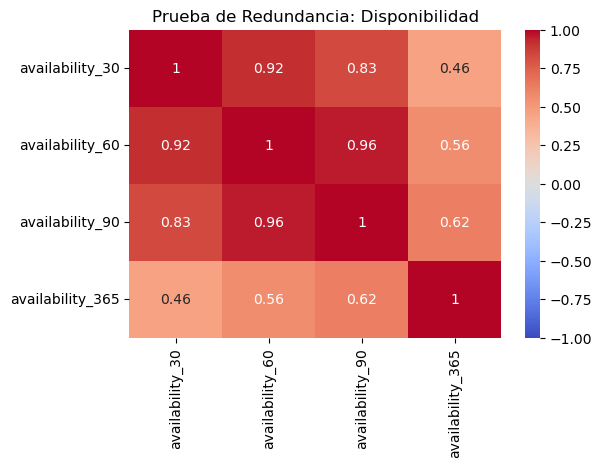

In [15]:
# Calculamos la correlación entre las columnas de disponibilidad
cols_avail = ['availability_30', 'availability_60', 'availability_90', 'availability_365']
correlacion = data[cols_avail].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Prueba de Redundancia: Disponibilidad")
plt.show()

In [16]:
#Ahora eliminamos columnas que tienen información redundante como 'bathrooms' y bathrooms_text'
#Las cuales pueden producir colinealidad o columnas que contienen información que ya se encuentra
#en otras columnas
data = data.drop(columns=[
    'bathrooms_text','host_listings_count','host_total_listings_count','calculated_host_listings_count_entire_homes'
    ,'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms',
    'has_availability','availability_60','availability_90','number_of_reviews_ltm','number_of_reviews_l30d',
    'number_of_reviews_ly','first_review','last_review','minimum_minimum_nights','maximum_minimum_nights',
    'minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm']
, errors='ignore')

### de las noches se dejó alguna?

In [17]:
#Transformamos 'Price' a númerico para poder hacer un mejor análisis de las variables sobre el precio
data['price'] = data['price'].astype(str).str.replace('$', '', regex=False)
data['price'] = data['price'].str.replace(',', '', regex=False)
data['price'] = pd.to_numeric(data['price'], errors='coerce')

In [18]:
#Para rubros como amenidades y verificaciones las cuales muy probablemente tengan impacto en la confianza
#y valor del inmueble contaremos cuantas de ellas hay y las sumaremos para que tengan un valor significativo
#De otra forma sería muy difícil separarlas en; por ejemplo WiFi e Internet que son lo mismo pero escrito de una manera distinta
if 'amenities' in data.columns:
    data['n_amenities'] = data['amenities'].astype(str).str.count(',') + 1

if 'host_verifications' in data.columns:
    data['n_verifications'] = data['host_verifications'].astype(str).str.count(',') + 1

### si es bueno sumar amenities? no es mejor separalos y codifircarlos con 0 o 1 para ver si lo tiene o no?

In [19]:
data['property_type'].value_counts()

property_type
Entire rental unit                    10588
Private room in rental unit            5799
Room in hotel                           486
Entire serviced apartment               412
Entire condo                            331
Entire loft                             228
Private room in condo                   212
Private room in home                    203
Private room in hostel                  201
Room in boutique hotel                  175
Private room in bed and breakfast       159
Entire home                              99
Shared room in hostel                    73
Private room in casa particular          51
Private room in guest suite              36
Private room in loft                     26
Private room in serviced apartment       26
Private room in guesthouse               25
Entire guest suite                       25
Room in hostel                           24
Entire vacation home                     23
Room in serviced apartment               18
Entire townhouse  

In [20]:
#Ya que hay demasiados tipos de propiedad, nos quedaremos con los top 5 y el resto son "Other".
if 'property_type' in data.columns:
    top_types = data['property_type'].value_counts().nlargest(5).index
    data['property_type_clean'] = data['property_type'].apply(lambda x: x if x in top_types else 'Other')

### Esto no me convence del todo...

#Variables categóricas consistentes en formato

In [21]:
#Damos formato a las fechas como a la antiguedad para que haya coherencia y sentido en los datos
if 'host_since' in data.columns:
    data['host_since'] = pd.to_datetime(data['host_since'], errors='coerce')
    data['host_years'] = (pd.to_datetime("now") - data['host_since']).dt.days / 365

#Variables categóricas y numéricas codificadas

In [22]:
#Transformaremos estas variables en valores booleanos para poder ser utilizados en un modelo matemático
booleanos = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'instant_bookable']
for col in booleanos:
    if col in data.columns:
        data[col] = data[col].map({'t': 1, 'f': 0})

In [23]:
#Para tiempo de respuesta asignamos números basándonos en la velocidad de respuesta (0 es el más rápido)
trespuesta = {'within an hour': 0,'within a few hours': 1,'within a day': 2,'a few days or more': 3}
if 'host_response_time' in data.columns:
    data['host_response_time'] = data['host_response_time'].map(trespuesta)
    data['host_response_time'] = data['host_response_time'].fillna(0)

In [24]:
# En 'neighbourhood_cleansed' no podemos hacer uso del Hot encoding, ya que crearíamos 70 columnas nuevas
# entonces reemplazamos el nombre del barrio por el porcentaje de los anuncios en ese barrio".
if 'neighbourhood_cleansed' in data.columns:
    freq_barrio = data['neighbourhood_cleansed'].value_counts(normalize=True)
    data['neighbourhood_cleansed_freq'] = data['neighbourhood_cleansed'].map(freq_barrio)

### hmmmmmmmmmm no sé yo...

In [25]:
# Convertimos estas categóricas en columnas binarias (0 y 1)
roomtyngh = ['room_type', 'neighbourhood_group_cleansed']
cols_existentes = [c for c in roomtyngh if c in data.columns]
data = pd.get_dummies(data, columns=cols_existentes, drop_first=True)
data['room_type']=copia['room_type']


In [26]:
#Pasamos a enteros para evitar problemas con el modelo
cols_bool = data.select_dtypes(include=['bool']).columns
data[cols_bool] = data[cols_bool].astype(int)

In [27]:
#Borramos las columnas de texto originales complejas que ya transformamos
cols_drop_final = ['host_verifications','property_type', 'host_location', 'host_since']
# cols_drop_final = ['amenities', 'host_verifications', 'neighbourhood_cleansed','property_type', 'host_location', 'host_since']
data = data.drop(columns=cols_drop_final, errors='ignore')

#Duplicados

In [28]:
#Buscamos inmuebles duplicados para eliminarlos de la base de datos buscando aquellos que tengan
#la misma latitud, longitud, precio y habitaciones. IMPORTANTE mencionar que incuimos precio y
#habitaciones ya que solamente con latitud y longitud podríamos estar habalndo de un inmueble
#distitno en una misma torre de apartamentos por ejemplo, con estos filtros nos aseguramos de
#eliminar solamente los verdaderos duplicados.
clave = ['latitude', 'longitude', 'price', 'bedrooms']
dups = data.duplicated(subset=clave).sum()
data.drop_duplicates(subset=clave, keep='first', inplace=True)
print(f"Se eliminaron {dups} duplicados.")
print(f"Datos restantes: {data.shape[0]}")

Se eliminaron 507 duplicados.
Datos restantes: 18903


#Datos faltantes

In [29]:
data.shape

(18903, 52)

In [30]:
data.isnull().sum()

name                                                   0
host_response_time                                     0
host_response_rate                                  3084
host_acceptance_rate                                2711
host_is_superhost                                    380
host_has_profile_pic                                   5
host_identity_verified                                 5
neighbourhood_cleansed                                 0
latitude                                               0
longitude                                              0
accommodates                                           0
bathrooms                                           3975
bedrooms                                            1947
beds                                                4045
amenities                                              0
price                                               3985
minimum_nights                                         0
maximum_nights                 

In [31]:
#Es necesario trabajar solamente con las filas que tengan información sobre el precio, por lo que
#eliminaremos las filas de 'Price' con datos faltantes
data = data.dropna(subset=['price'])

In [32]:
# Utilizamos 'IterativeImputer' para rellenar los valores faltantes en las variables
# camas, habitaciones, baños y capacidad. Este método modela cada característica
# en función de las otras, haciendo relaciones lógicas
# (ej. una propiedad con mayor capacidad tiende a tener más camas).
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
cols_relacionadas = ['accommodates', 'bedrooms', 'beds', 'bathrooms']
imputer = IterativeImputer(max_iter=10, random_state=0)
data[cols_relacionadas] = imputer.fit_transform(data[cols_relacionadas])
data[cols_relacionadas] = data[cols_relacionadas].round()

In [33]:
# Eliminamos los NA de'host_since','host_verifications', 'host_has_profile_pic' y 'host_identity_verified'
# ya que solo tenemos 3 datos faltantes los cuales representan aprox. 0.03%
columnasna = [
    'host_has_profile_pic',
    'host_identity_verified']
data = data.dropna(subset=columnasna)

In [34]:
#Ya que estamos hablando de tasas remplazaremos los valores faltantes por la mediana ya que usar
#el promedio podría afectar a otros hosts, pero primero transformamos la variable a una númerica
tasas = ['host_response_rate', 'host_acceptance_rate']
for col in tasas:
    if col in data.columns:
        data[col] = data[col].astype(str).str.replace('%', '', regex=False)
        data[col] = pd.to_numeric(data[col], errors='coerce')
        data[col] = data[col].fillna(data[col].median())

# Para las filas sin datos de 'reviews_per_month' se les asignará 0 como si no hubieran tenido una reseña ese mes
if 'reviews_per_month' in data.columns:
    data['reviews_per_month'] = data['reviews_per_month'].fillna(0)

# Para los puntajes asignaremos la Mediana ya que una vez más es un valor más justo
puntajes = [col for col in data.columns if 'review_scores' in col]
for col in puntajes:
    data[col] = data[col].fillna(data[col].median())

# Ya que es una variable cualitativa la mejor opción es usar la moda para rellenar los datos faltantes.
#Además ya que ser super host es algo sobre saliente es muy probable que la mayoría de hosts no lo sean
categ = ['host_response_time', 'host_is_superhost']
for col in categ:
    if col in data.columns:
        moda = data[col].mode()[0]
        data[col] = data[col].fillna(moda)

# En esta variable decidimos rellenar los datos con con 'Unknown' ya que es muy difícil intenatar predecir
#una ubicación geográfica
if 'host_location' in data.columns:
    data['host_location'] = data['host_location'].fillna("Unknown")


#Análisis y tratamiento de outliers.

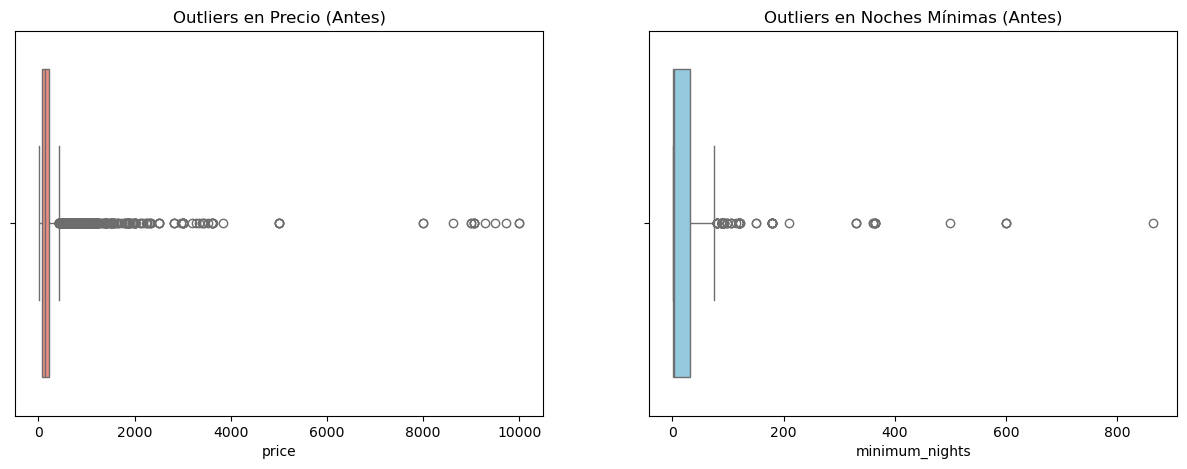

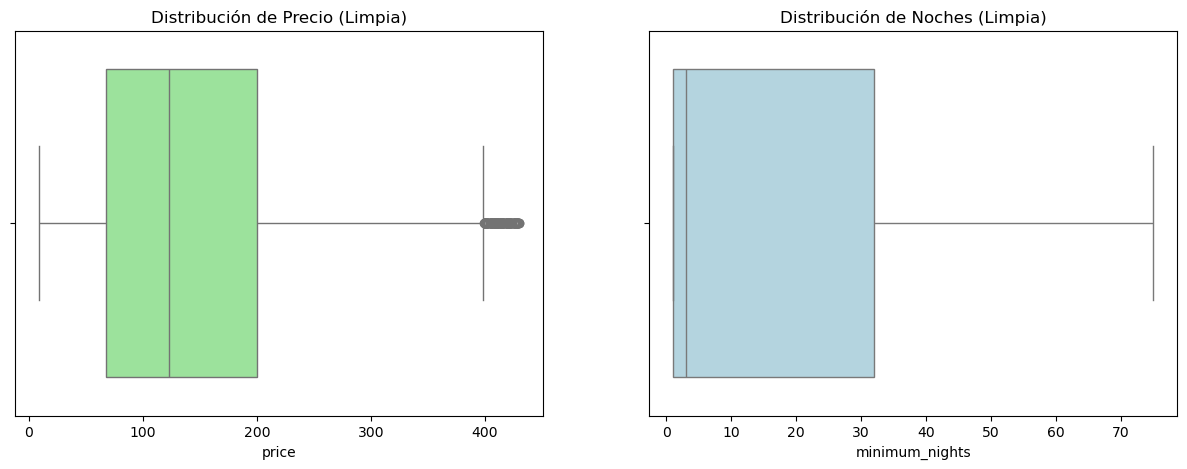

Se eliminaron un total de 864 outliers.
Se eliminaron mayores a 430.00€
Se eliminaron estancias mayores a 78.5 noches


In [35]:
#Graficamos dónde se encuentran los outliers actuales
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x=data['price'], ax=axes[0], color='salmon')
axes[0].set_title('Outliers en Precio (Antes)')
sns.boxplot(x=data['minimum_nights'], ax=axes[1], color='skyblue')
axes[1].set_title('Outliers en Noches Mínimas (Antes)')
plt.show()
n_inicial = len(data)
#Eliminamos los outliers de la base de datos
def eliminar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    li = Q1 - 1.5 * IQR
    ls = Q3 + 1.5 * IQR
    #Los almacenamos en otra variable
    data_limpio = df[(df[columna] >= li) & (df[columna] <= ls)].copy()
    return data_limpio, ls
data, limite_precio = eliminar_outliers(data, 'price')
data, limite_noches = eliminar_outliers(data, 'minimum_nights')
#Obtenemos el número de outliers eliminados
n_final = len(data)
n_eliminados = n_inicial - n_final
#Graficamos la distribución limpia o sin outliers
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x=data['price'], ax=axes[0], color='lightgreen')
axes[0].set_title('Distribución de Precio (Limpia)')
sns.boxplot(x=data['minimum_nights'], ax=axes[1], color='lightblue')
axes[1].set_title('Distribución de Noches (Limpia)')
plt.show()

print(f"Se eliminaron un total de {n_eliminados} outliers.")
print(f"Se eliminaron mayores a {limite_precio:.2f}€")
print(f"Se eliminaron estancias mayores a {limite_noches} noches")

Ya tenemos la base de datos limpia, sin datos faltantes y lista para el análisis exploratorio

In [36]:
data.isnull().sum()

name                                                0
host_response_time                                  0
host_response_rate                                  0
host_acceptance_rate                                0
host_is_superhost                                   0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood_cleansed                              0
latitude                                            0
longitude                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                            0
beds                                                0
amenities                                           0
price                                               0
minimum_nights                                      0
maximum_nights                                      0
availability_30             

In [37]:
data.head()

,name,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,...,neighbourhood_group_cleansed_Eixample,neighbourhood_group_cleansed_Gràcia,neighbourhood_group_cleansed_Horta-Guinardó,neighbourhood_group_cleansed_Les Corts,neighbourhood_group_cleansed_Nou Barris,neighbourhood_group_cleansed_Sant Andreu,neighbourhood_group_cleansed_Sant Martí,neighbourhood_group_cleansed_Sants-Montjuïc,neighbourhood_group_cleansed_Sarrià-Sant Gervasi,room_type
0,Huge flat for 8 people close to Sagrada Familia,0.0,96.0,91.0,0.0,1.0,1.0,la Sagrada Família,41.405560,2.17262,...,1,0,0,0,0,0,0,0,0,Entire home/apt
1,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",0.0,100.0,96.0,1.0,1.0,1.0,el Besòs i el Maresme,41.412432,2.21975,...,0,0,0,0,0,0,1,0,0,Entire home/apt
2,Sagrada Familia area - Còrsega 1,0.0,100.0,100.0,0.0,1.0,1.0,el Camp d'en Grassot i Gràcia Nova,41.405660,2.17015,...,0,1,0,0,0,0,0,0,0,Entire home/apt
3,Stylish Top Floor Apartment - Ramblas Plaza Real,0.0,100.0,92.0,0.0,1.0,1.0,el Barri Gòtic,41.380620,2.17517,...,0,0,0,0,0,0,0,0,0,Entire home/apt
4,VIDRE HOME PLAZA REAL on LAS RAMBLAS,0.0,100.0,92.0,0.0,1.0,1.0,el Barri Gòtic,41.379780,2.17623,...,0,0,0,0,0,0,0,0,0,Entire home/apt


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14051 entries, 0 to 19409
Data columns (total 52 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   name                                              14051 non-null  object 
 1   host_response_time                                14051 non-null  float64
 2   host_response_rate                                14051 non-null  float64
 3   host_acceptance_rate                              14051 non-null  float64
 4   host_is_superhost                                 14051 non-null  float64
 5   host_has_profile_pic                              14051 non-null  float64
 6   host_identity_verified                            14051 non-null  float64
 7   neighbourhood_cleansed                            14051 non-null  object 
 8   latitude                                          14051 non-null  float64
 9   longitude             

#Análisis Exploratorio de Datos

In [39]:
desc_stats = data.describe().T
print(desc_stats[['mean', 'std', 'min', 'max']])

                                                          mean           std  \
host_response_time                                    0.404313      0.748621   
host_response_rate                                   93.308163     16.049416   
host_acceptance_rate                                 85.471141     25.297775   
host_is_superhost                                     0.237634      0.425649   
host_has_profile_pic                                  0.961853      0.191557   
host_identity_verified                                0.955377      0.206482   
latitude                                             41.392323      0.013969   
longitude                                             2.166938      0.017806   
accommodates                                          3.402889      1.935292   
bathrooms                                             1.382037      0.665426   
bedrooms                                              1.731834      1.035785   
beds                                    

In [40]:
#Podemos observar que tener un máximo de 127 camas es ilogico por lo que probablemente es un error de dedo
#o computo de igual forma tener 0 camas y 0 baños no hace sentido ni es permitido, pondremos filtros
n_antes = len(data)
data = data[
    (data['beds'] > 0) & (data['beds'] <= 20) &
    (data['bathrooms'] > 0) & (data['bathrooms'] <= 10)
].copy()
# Cálculo de filas eliminadas
n_despues = len(data)
eliminados = n_antes - n_despues
print(f"Se eliminaron {eliminados} registros inconsistentes o extremos.")

Se eliminaron 636 registros inconsistentes o extremos.


### hmmmmmm

Ahora si continuamos con el análisis

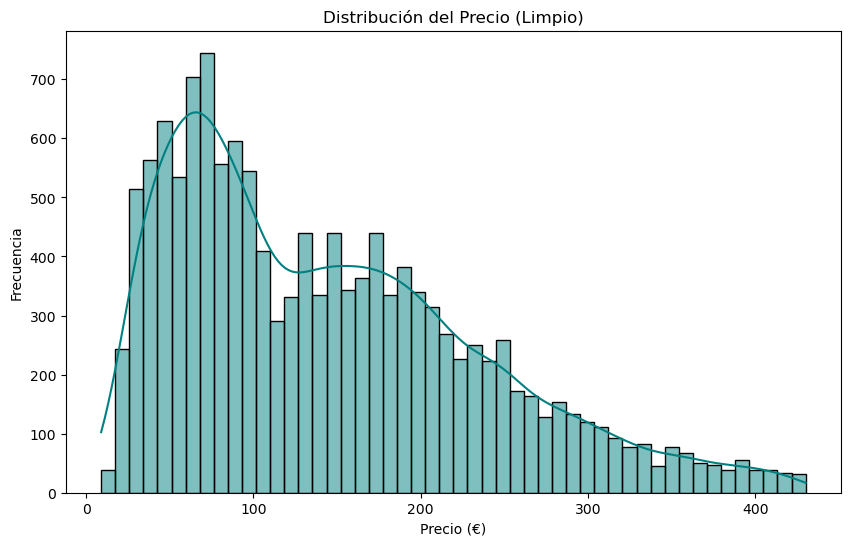

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=50, kde=True, color='teal')
plt.title('Distribución del Precio (Limpio)')
plt.xlabel('Precio (€)')
plt.ylabel('Frecuencia')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_44280\4272359774.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='property_type_clean', y='price', data=data, palette='Set2')


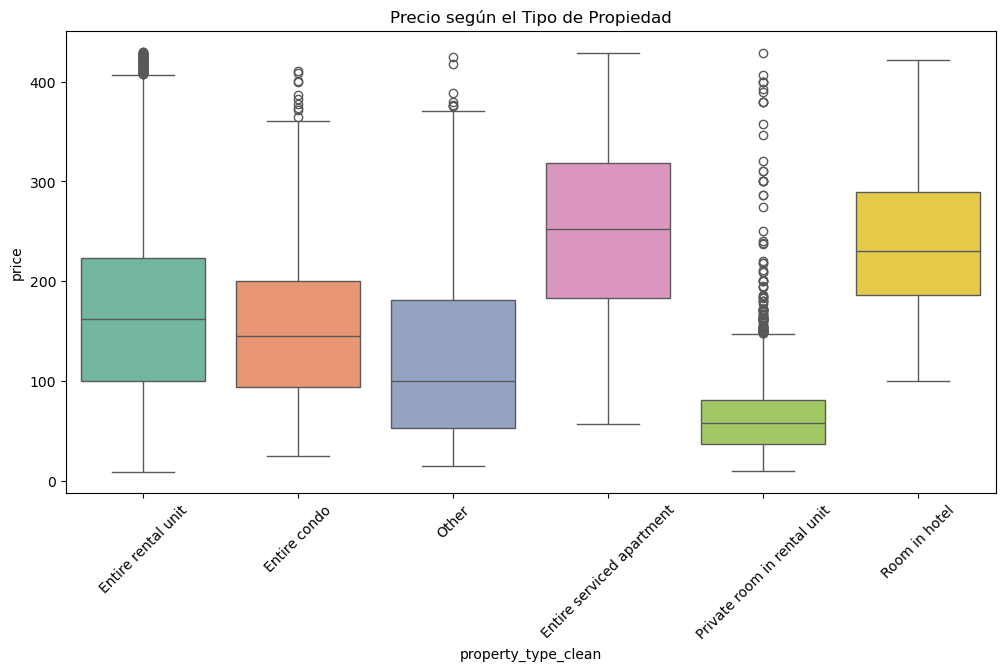

In [42]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='property_type_clean', y='price', data=data, palette='Set2')
plt.title('Precio según el Tipo de Propiedad')
plt.xticks(rotation=45)
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_44280\1356646007.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='host_is_superhost', y='price', data=data, palette='Pastel1')


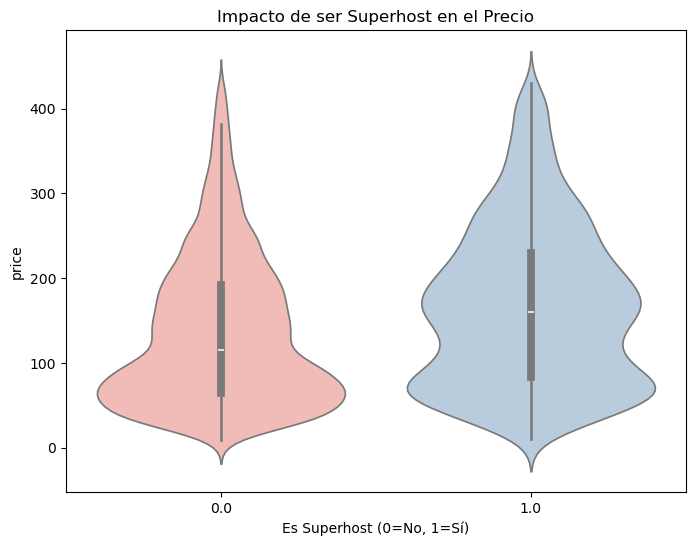

In [43]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='host_is_superhost', y='price', data=data, palette='Pastel1')
plt.title('Impacto de ser Superhost en el Precio')
plt.xlabel('Es Superhost (0=No, 1=Sí)')
plt.show()


Text(0.5, 1.0, 'Impacto de la Calificación en el Precio')

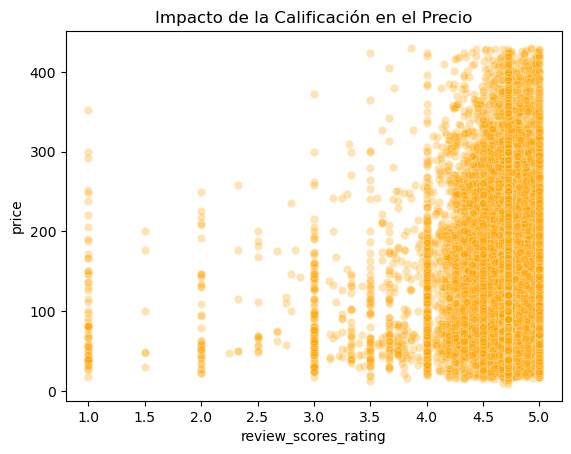

In [44]:
sns.scatterplot(x='review_scores_rating', y='price', data=data, alpha=0.3, color='orange')
plt.title('Impacto de la Calificación en el Precio')

Text(0.5, 1.0, 'Precio según Capacidad de Personas')

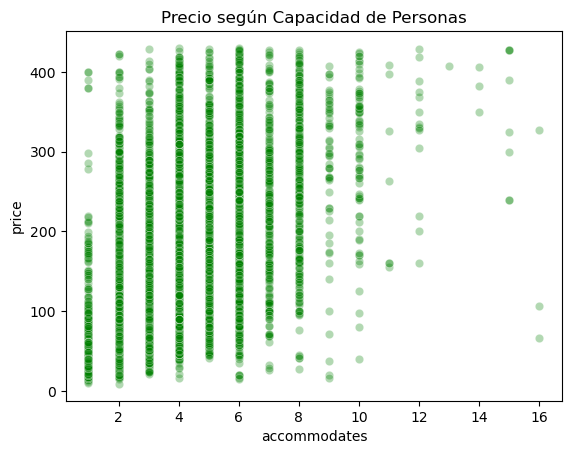

In [45]:
sns.scatterplot(x='accommodates', y='price', data=data, alpha=0.3, color='green')
plt.title('Precio según Capacidad de Personas')

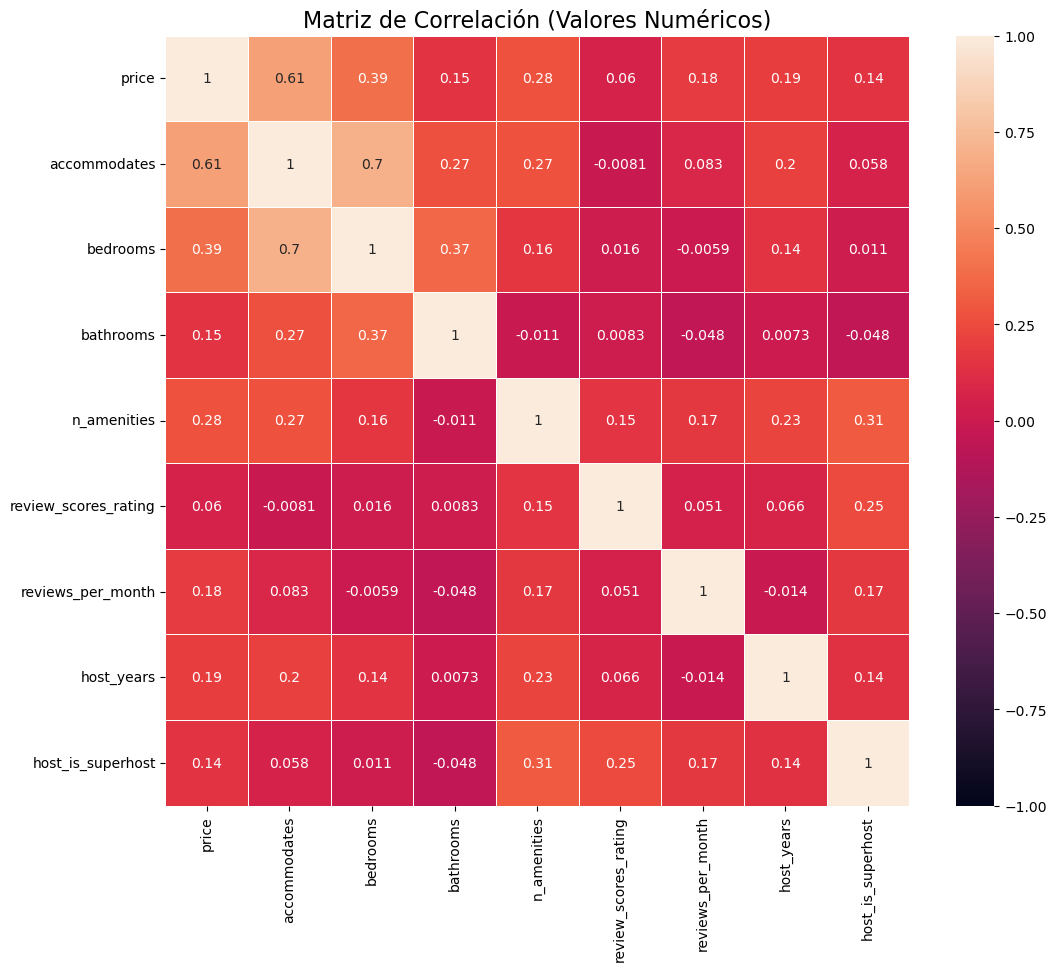

In [46]:
cols_heatmap = [
    'price',
    'accommodates',
    'bedrooms',
    'bathrooms',
    'n_amenities',
    'review_scores_rating',
    'reviews_per_month',
    'host_years',
    'host_is_superhost']
cols_existentes = [c for c in cols_heatmap if c in data.columns]
corr_matrix = data[cols_existentes].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    vmin=-1, vmax=1,
    linewidths=0.5
)
plt.title('Matriz de Correlación (Valores Numéricos)', fontsize=16)
plt.show()

In [47]:
print(data)

                                                    name  host_response_time  \
0        Huge flat for 8 people close to Sagrada Familia                 0.0   
1      Forum CCIB DeLuxe, Spacious, Large Balcony, relax                 0.0   
2                       Sagrada Familia area - Còrsega 1                 0.0   
3       Stylish Top Floor Apartment - Ramblas Plaza Real                 0.0   
4                   VIDRE HOME PLAZA REAL on LAS RAMBLAS                 0.0   
...                                                  ...                 ...   
19404     Apartamento con terraza en el centro histórico                 1.0   
19405                          Sant Pau Barcelona Suites                 1.0   
19406                         The Ultimate Central Place                 1.0   
19407                                The Gaudi Suites II                 1.0   
19409                     Barcelona -Rent Eixample House                 0.0   

       host_response_rate  host_accepta

In [48]:
data['neighbourhood_cleansed'].unique()


array(['la Sagrada Família', 'el Besòs i el Maresme',
       "el Camp d'en Grassot i Gràcia Nova", 'el Barri Gòtic',
       "la Dreta de l'Eixample", 'Vallcarca i els Penitents', 'el Raval',
       'el Poblenou', 'el Clot', 'el Poble Sec', 'Sant Antoni', 'Sants',
       'Pedralbes', 'el Guinardó', 'la Vila de Gràcia', 'el Fort Pienc',
       'la Barceloneta', 'Sant Martí de Provençals',
       "l'Antiga Esquerra de l'Eixample",
       "la Nova Esquerra de l'Eixample", 'Sarrià',
       'el Parc i la Llacuna del Poblenou',
       'Sant Pere, Santa Caterina i la Ribera',
       'la Vila Olímpica del Poblenou', 'les Corts',
       'Diagonal Mar i el Front Marítim del Poblenou',
       'Sant Gervasi - Galvany', 'el Congrés i els Indians',
       'el Putxet i el Farró', 'la Bordeta', 'la Maternitat i Sant Ramon',
       'Provençals del Poblenou', "la Font d'en Fargues", 'Sants - Badal',
       'Navas', 'el Carmel', 'Hostafrancs', 'la Salut',
       'la Trinitat Vella', 'la Font de la Guatlla

In [49]:
data['price'] 

0        210.0
1        285.0
2        170.0
3        110.0
4        333.0
         ...  
19404     63.0
19405     90.0
19406     90.0
19407     90.0
19409    120.0
Name: price, Length: 13415, dtype: float64

In [50]:
import joblib

data.to_csv('data_clean_barcelona.csv', index=False)
print("Archivos exportados exitosamente.")

Archivos exportados exitosamente.
